# Exploratory Data Analysis

The first step in any data science project is to getting know the data we work with.

In this notebook you can see a basic explanatory data analysis on New York Taxi dataset.

We will perform a basic statistical analysis that will help us to understand the behaviors of each feature and also examine and find outliers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import IPython
sns.set()

First we will load the data and immediately after that, as you can see, we will take a look of small portion of the data just to try and understand what it is about. After that we will start and examine it is main properties:
1. The size of the data.
2. The different types of features.

In [3]:
df = pd.read_csv("./data/dataset.csv")
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.shape

(38000, 8)

In order to get a complete picture of our data, you need to understand exactly what each feature means, so in most cases where you will use data that is external to your organization, make sure that there is a full explanation as in the following [**link**](https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data) from which I got the data for this project.


### Data fields
#### ID
    1. key - Unique string identifying each row in both the training and test sets. Comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field.

#### Features
    1. pickup_datetime - timestamp value indicating when the taxi ride started.
    2. pickup_longitude - float for longitude coordinate of where the taxi ride started.
    3. pickup_latitude - float for latitude coordinate of where the taxi ride started.
    4. dropoff_longitude - float for longitude coordinate of where the taxi ride ended.
    5. dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
    6. passenger_count - integer indicating the number of passengers in the taxi ride.

#### Target
    1. fare_amount - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

And of course beside the meanig of each feature you need exmine the types of the feature.

In [4]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Now we will start and examine the statistical characteristics of each feature, initial information that can give us different directions in finding outliers, dummies, etc.

In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000,38000.000000
mean,11.348630,-72.507625,39.932528,-72.495517,39.919080,1.663237
std,9.639597,10.410071,6.329258,10.448033,6.066357,1.283981
min,-3.000000,-75.414728,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992065,40.734809,-73.991182,40.734324,1.000000
50%,8.500000,-73.981737,40.752701,-73.980210,40.753339,1.000000
75%,12.500000,-73.967051,40.767342,-73.963799,40.768162,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


It can be seen that there is a fairly large difference between the average and the maximum and minimum of all the geographic indices, 
which raises the question of whether these are outliers.

In order to understand if this is indeed the case, we will take a look at the joint probability of each pair of geographic variables : 

    1. pickup_longitude, pickup_latitude.
    2. dropoff_longitude, dropoff_latitude

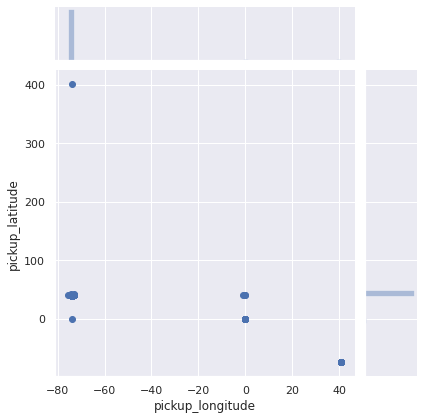

In [6]:
sns.jointplot(data=df, x="pickup_longitude", y="pickup_latitude")

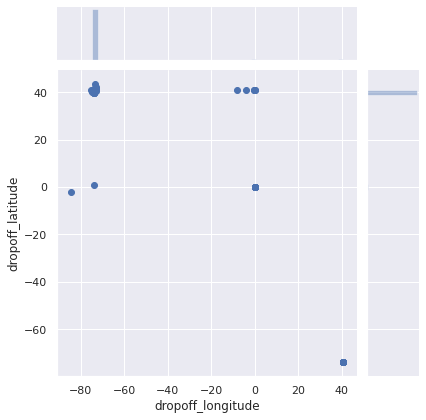

In [7]:
sns.jointplot(data=df, x="dropoff_longitude", y="dropoff_latitude")

Another outlires we can see is the in the target where we got fare amount that is lower than 0.

Text(0.5, 1.0, 'Distribution of the fare amount')

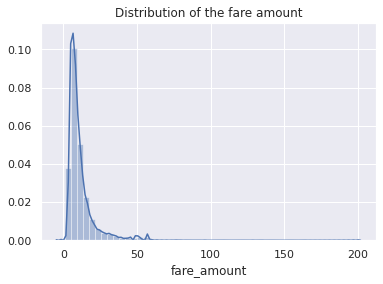

In [8]:
sns.distplot(df['fare_amount'])
plt.title('Distribution of the fare amount')

When we have a dimension of time in the data, a good practice is to look at the distribution of features against our time, of course after breaking down the time into days, hours, months, etc.

Here you can see the distribution of the the fare amount vs time.

In [4]:
df["pickup_datetime"] = pd.to_datetime(
        df["pickup_datetime"], format="%Y-%m-%d %H:%M:%S UTC"
    )

df["hour"] = df.pickup_datetime.dt.hour
df["day"] = df.pickup_datetime.dt.day
df["month"] = df.pickup_datetime.dt.month
df["weekday"] = df.pickup_datetime.dt.weekday
df["year"] = df.pickup_datetime.dt.year

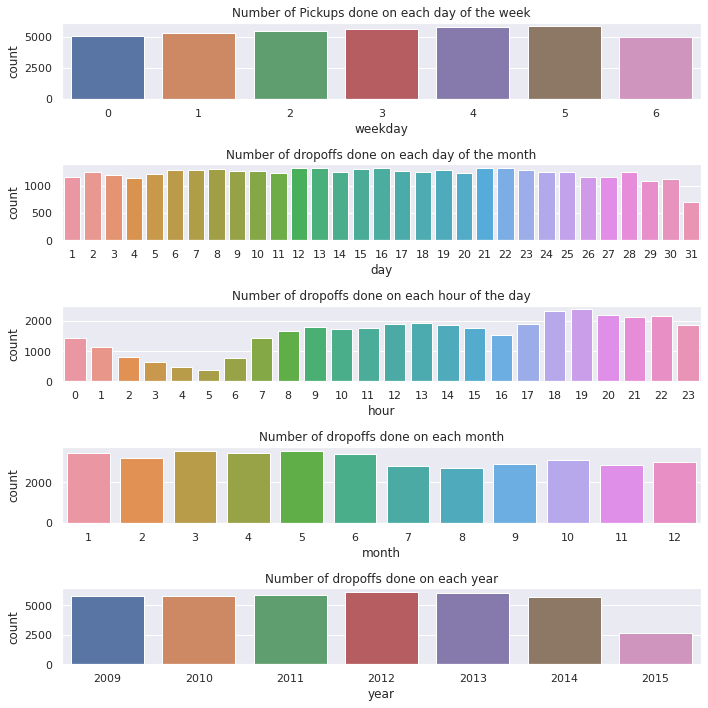

In [10]:
figure,ax=plt.subplots(nrows=5,ncols=1,figsize=(10,10))
sns.countplot(x='weekday',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the month')
sns.countplot(x='hour',data=df,ax=ax[2])
ax[2].set_title('Number of dropoffs done on each hour of the day')
sns.countplot(x='month',data=df,ax=ax[3])
ax[3].set_title('Number of dropoffs done on each month')
sns.countplot(x='year',data=df,ax=ax[4])
ax[4].set_title('Number of dropoffs done on each year')
plt.tight_layout()


In addition, it is worth looking at the correlation matrix between the various features, with the help of which maybe to dilute some of them in order to or maybe even connect them to a single feature

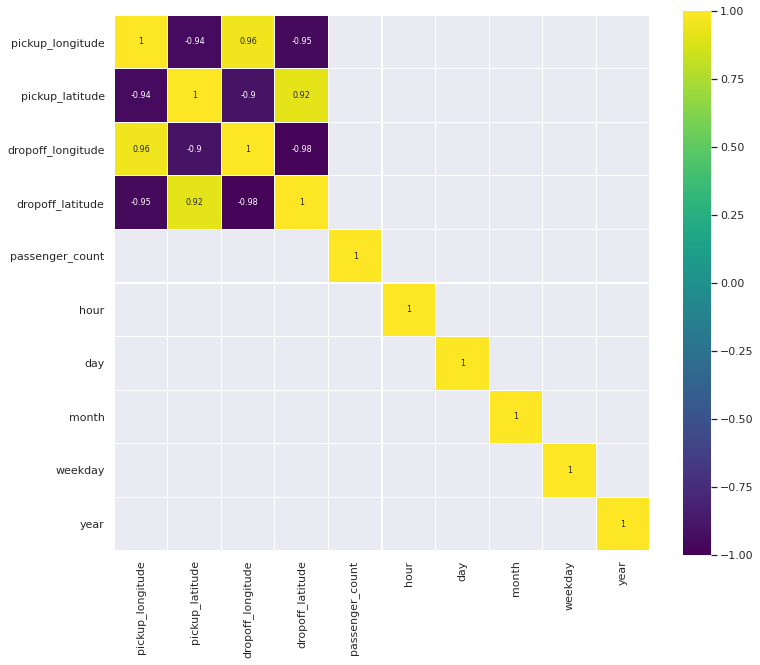

In [11]:
corr = df.drop('fare_amount', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Conclusions that arose from the following analysis:

    1. It can be seen that all of our geographic parameters have outliers when longitude<-200 and latitude>200

    2. Fare amount includes also outliers.

    3. The number of passengers is a number between 1 to 6 can be considered as dummies.

    4. There is a fairly equal distribution of the fare amount against time.

Of course, this is a notebook that presents only a basic and initial analysis of the data, you can see more detailed examples of the analysis in the following links : 
1. https://medium.com/analytics-vidhya/exploratory-data-analysis-of-nyc-taxi-trip-duration-dataset-using-python-257fdef2749e
2. https://www.analyticsvidhya.com/blog/2021/01/exploratory-data-analysis-on-nyc-taxi-trip-duration-dataset/

### Analyis with MLRUN

You can see by simply running the describe function from our Market Place you can get a lot of information about the data and perform a qualitative and in-depth analysis on it.

In [11]:
df.to_csv('./data/data_set_describe.csv', index=False)


import mlrun

project = mlrun.get_or_create_project(
    name="ny-taxi-eda", user_project=True, context="./"
)

# import the function
describe = mlrun.import_function('hub://describe')

describe_run = describe.run(params={'label_column': 'fare_amount', "problem_type": "regression"},
                            inputs={"table": './data/data_set_describe.csv'}, local=True)

> 2022-11-30 08:35:08,408 [info] loaded project ny-taxi-eda from MLRun DB
> 2022-11-30 08:35:08,451 [info] starting run describe-analyze uid=d41d2a03181a4a1f8b58ac66fe15558a DB=http://mlrun-api:8080
> 2022-11-30 08:35:15,084 [info] The data set is logged to the project under dataset name


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
ny-taxi-eda-davids,...fe15558a,0,Nov 30 08:35:08,completed,describe-analyze,v3io_user=davidskind=owner=davidshost=jupyter-davids-6996d5569d-p4mfk,table,label_column=fare_amountproblem_type=regression,,describe-csvhisthistogramsscatter-2dviolinimbalanceimbalance-weights-veccorrelation-matrix-csvcorrelationdataset


> 2022-11-30 08:35:15,185 [info] run executed, status=completed


#### Few examples for plots we get from mlrun describe function.

In [6]:
# view generated artifacts (charts)
describe_run.outputs

{'describe-csv': 'v3io:///projects/ny-taxi-eda-davids/artifacts/describe-analyze/0/describe-csv.csv',
 'hist': 'v3io:///projects/ny-taxi-eda-davids/artifacts/describe-analyze/0/hist.html',
 'histograms': 'v3io:///projects/ny-taxi-eda-davids/artifacts/describe-analyze/0/histograms.html',
 'scatter-2d': 'v3io:///projects/ny-taxi-eda-davids/artifacts/describe-analyze/0/scatter-2d.html',
 'violin': 'v3io:///projects/ny-taxi-eda-davids/artifacts/describe-analyze/0/violin.html',
 'correlation-matrix-csv': 'v3io:///projects/ny-taxi-eda-davids/artifacts/describe-analyze/0/correlation-matrix-csv.csv',
 'correlation': 'v3io:///projects/ny-taxi-eda-davids/artifacts/describe-analyze/0/correlation.html',
 'dataset': 'store://artifacts/ny-taxi-eda-davids/dataset:8de8a7c199cb41238ed6e0e21372debb'}

<img src="./images/describe.png" alt="describe" width="1000"/>